## Standard Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Loading and Cleaning Data

In [3]:
movies = pd.read_csv("./movies_metadata.csv")

In [4]:
movies.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [5]:
movies = movies['title genres runtime vote_average vote_count release_date'.split()]
movies.head()

,title,genres,runtime,vote_average,vote_count,release_date
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",81.0,7.7,5415.0,1995-10-30
1,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",104.0,6.9,2413.0,1995-12-15
2,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",101.0,6.5,92.0,1995-12-22
3,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",127.0,6.1,34.0,1995-12-22
4,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",106.0,5.7,173.0,1995-02-10


In [6]:
movies = movies.dropna()

<AxesSubplot:>

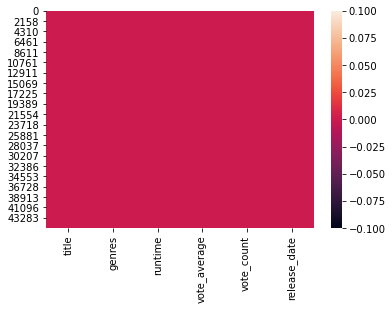

In [7]:
sns.heatmap(movies.isnull())

In [8]:
def clean_genres(x):
    gs = []
    x = x.strip("][").split(",")
    for l in range(1,len(x),2):
        y = x[l]
        gen = y.split(':')[1].split('}')[0].replace("'","").strip(" ")
        if gen.isalpha():
            gs.append(gen)
    return gs

In [9]:
movies['genres'] = movies['genres'].apply(clean_genres)

In [10]:
movies.head()

,title,genres,runtime,vote_average,vote_count,release_date
0,Toy Story,"[Animation, Comedy, Family]",81.0,7.7,5415.0,1995-10-30
1,Jumanji,"[Adventure, Fantasy, Family]",104.0,6.9,2413.0,1995-12-15
2,Grumpier Old Men,"[Romance, Comedy]",101.0,6.5,92.0,1995-12-22
3,Waiting to Exhale,"[Comedy, Drama, Romance]",127.0,6.1,34.0,1995-12-22
4,Father of the Bride Part II,[Comedy],106.0,5.7,173.0,1995-02-10


In [11]:
movies['release_year'] = movies['release_date'].apply(lambda x : pd.to_datetime(x).year)

In [12]:
movies = movies.drop('release_date',axis = 1)

In [13]:
movies.head()

,title,genres,runtime,vote_average,vote_count,release_year
0,Toy Story,"[Animation, Comedy, Family]",81.0,7.7,5415.0,1995
1,Jumanji,"[Adventure, Fantasy, Family]",104.0,6.9,2413.0,1995
2,Grumpier Old Men,"[Romance, Comedy]",101.0,6.5,92.0,1995
3,Waiting to Exhale,"[Comedy, Drama, Romance]",127.0,6.1,34.0,1995
4,Father of the Bride Part II,[Comedy],106.0,5.7,173.0,1995


In [14]:
movies.to_csv("../clean_movies_metadata.csv",index = False)

In [15]:
gen = movies.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)

In [16]:
gen.name = 'genre'

In [17]:
movies = movies.drop('genres',axis = 1).join(gen)

In [18]:
movies = movies.set_index(np.arange(0,89522))

In [19]:
movies.head()

,title,runtime,vote_average,vote_count,release_year,genre
0,Toy Story,81.0,7.7,5415.0,1995,Animation
1,Toy Story,81.0,7.7,5415.0,1995,Comedy
2,Toy Story,81.0,7.7,5415.0,1995,Family
3,Jumanji,104.0,6.9,2413.0,1995,Adventure
4,Jumanji,104.0,6.9,2413.0,1995,Fantasy


In this method we are not going to use any specific statistical methods. We are just going to ask the user their preferences and based on that we are going to suggest the similar movies according to the similar genre

In addtion to above, we are using our own ***Score*** which takes into account the number of persons voted and what is their score. 

<img src="Score_Equation.png">

In [20]:
def show_recommendations(df,percentile):
    print("Input preferred Genre")
    genre = input()
    print("Input duration range separated by space")
    low_time,high_time = map(int,input().split())
    print("Input Year range separated by space")
    low_year,high_year = map(int,input().split())
    movies = df.copy()
    movies = movies[(movies['genre'] == genre) & 
                    (movies['runtime'] >= low_time) & 
                    (movies['runtime'] <= high_time) & 
                    (movies['release_year'] >= low_year) & 
                    (movies['release_year'] <= high_year)]
    C = movies['vote_average'].mean()
    m = movies['vote_count'].quantile(percentile)
    
    q_movies = movies.copy().loc[movies['vote_count'] >= m]
    
    q_movies['score'] = q_movies.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) 
                                       + (m/(m+x['vote_count']) * C)
                                       ,axis=1)
    q_movies = q_movies.sort_values('score', ascending=False)
    return q_movies

Here percentile specifies the range over which we want the data. We have input 80 percentile or 0.8 which means that we'll be recommended Top 20 percent of the movies that we prefer

In [21]:
show_recommendations(movies,0.8).head(25)

Input preferred Genre


 Fantasy


Input duration range separated by space


 60 180


Input Year range separated by space


 2000 2020


,title,runtime,vote_average,vote_count,release_year,genre,score
12797,Spirited Away,125.0,8.3,3968.0,2001,Fantasy,7.956989
11327,The Lord of the Rings: The Fellowship of the Ring,178.0,8.0,8892.0,2001,Fantasy,7.854003
13567,The Lord of the Rings: The Two Towers,179.0,8.0,7641.0,2002,Fantasy,7.831868
39127,Harry Potter and the Deathly Hallows: Part 2,130.0,7.9,6141.0,2011,Fantasy,7.703555
22465,Howl's Moving Castle,119.0,8.2,2049.0,2004,Fantasy,7.632428
17941,Harry Potter and the Prisoner of Azkaban,141.0,7.7,6037.0,2004,Fantasy,7.518846
25020,V for Vendetta,132.0,7.7,4562.0,2006,Fantasy,7.467187
11055,Donnie Darko,113.0,7.7,3574.0,2001,Fantasy,7.412216
47773,The Hobbit: The Desolation of Smaug,161.0,7.6,4633.0,2013,Fantasy,7.381981
56186,Star Wars: The Force Awakens,136.0,7.5,7993.0,2015,Fantasy,7.374222


We can see that we get the top 20 Fantasy movies